# Question 2

Predict whether the patient is healthy (unlikely) or is not healthy (likely) to get a stroke based on
various features such as their gender, age, or their residence. Do they have heart disease? or
what is their work type? Do they have a smoking habit? to name a few of the features. Use
healthcare stroke dataset, which contains around 5000 records of the patients, and apply SVM
or Random Forest to classify the patient is healthy or needs medical assistance.

### Dataset and libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [15]:
healthcare = pd.read_csv('/Users/pierre/Downloads/Stroke Prediction Dataset/healthcare-dataset-stroke-data.csv')

healthcare.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Exploratory Data Analysis

#### Correlation matrix

/var/folders/ps/9trpwqzd3cd9vm8fpwlxxyxw0000gn/T/ipykernel_74942/3481519599.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = healthcare.corr()


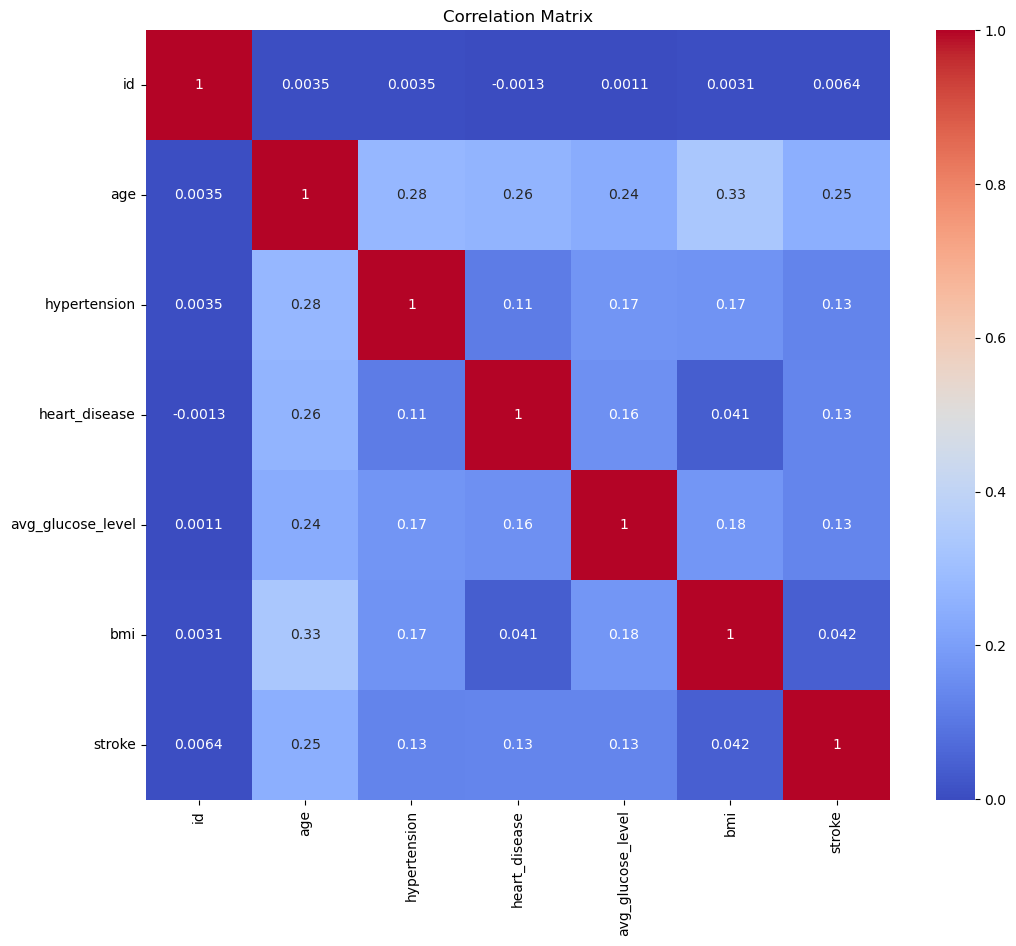

In [16]:
plt.figure(figsize=(12, 10))
correlation_matrix = healthcare.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Pairplot

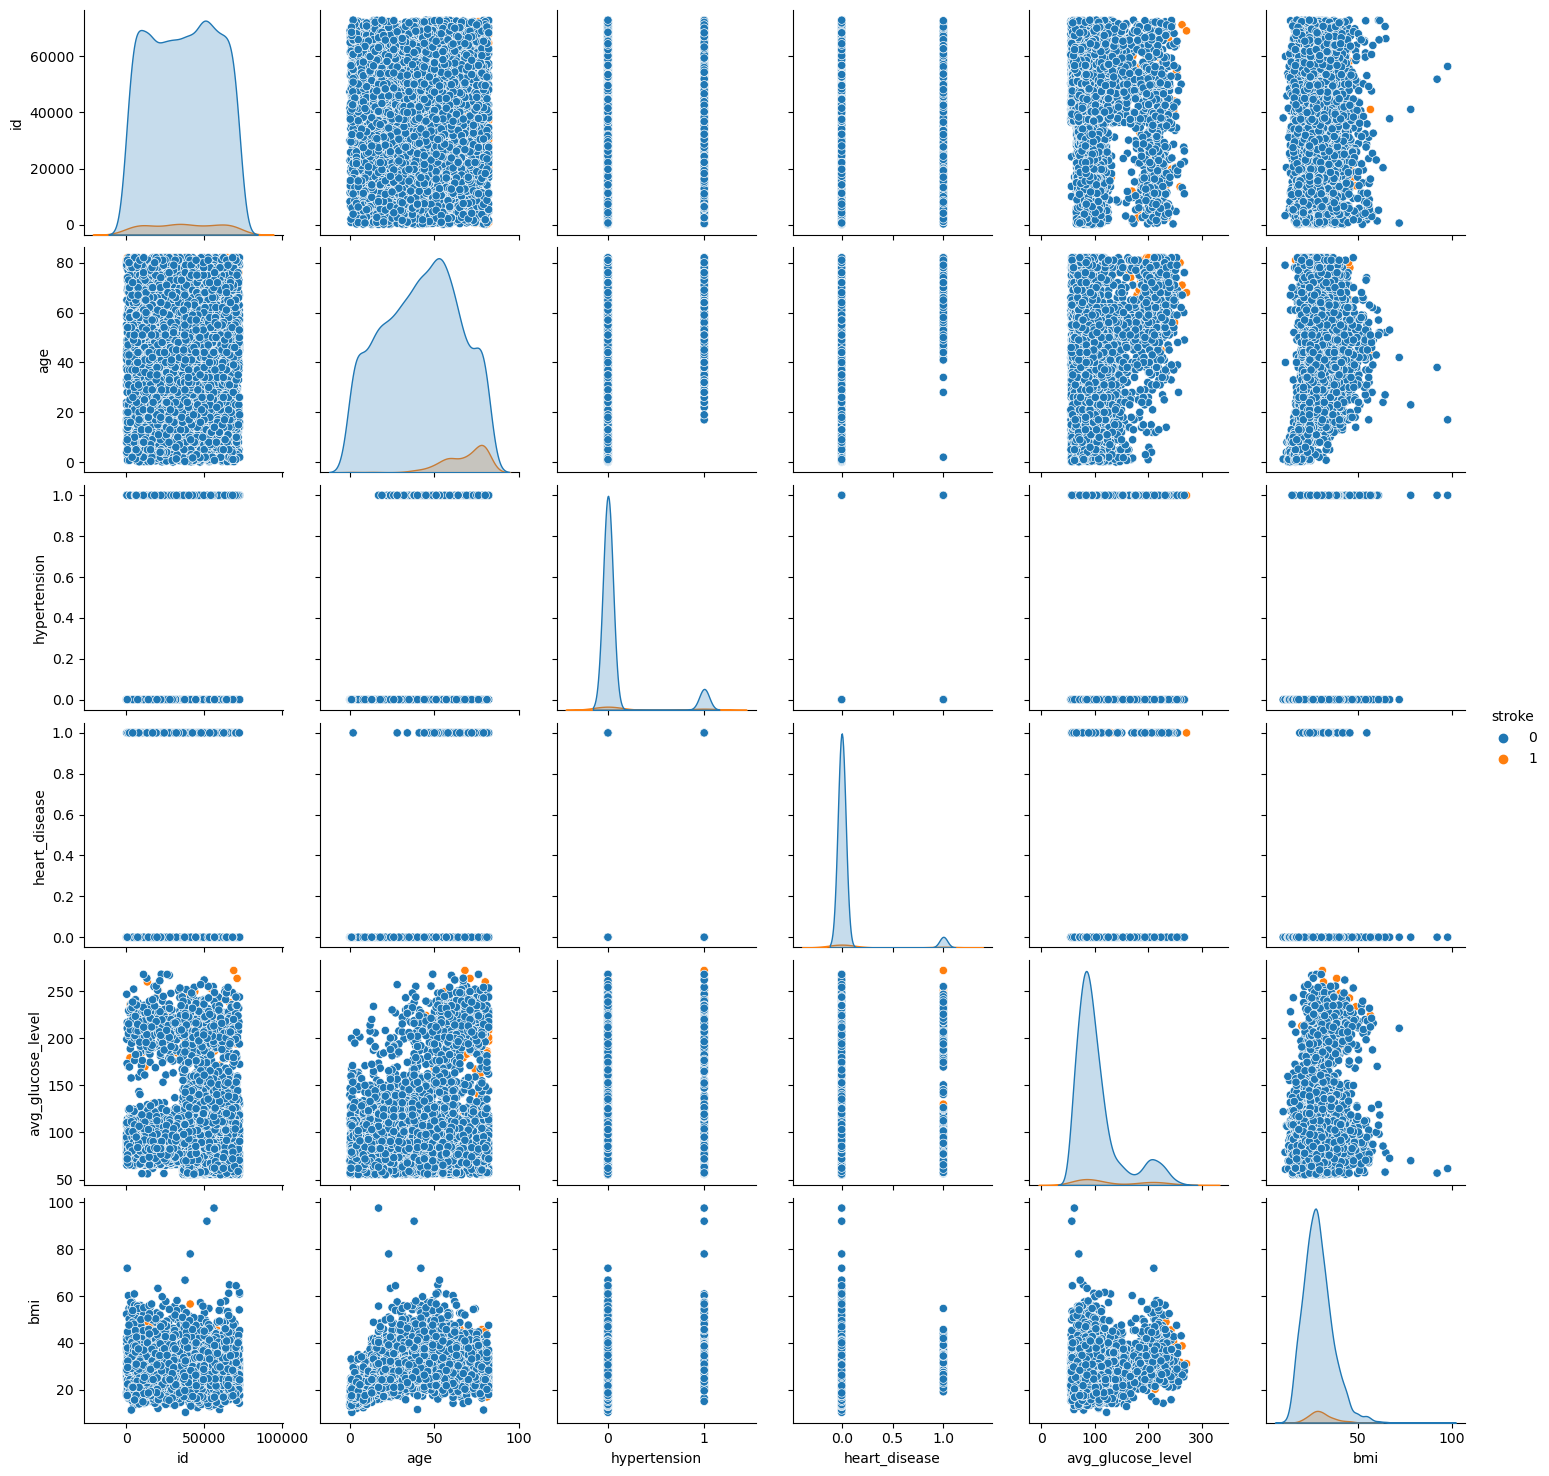

In [17]:
sns.pairplot(healthcare, hue='stroke')
plt.show()

### Clean the data

We look for na values.

In [18]:
print(healthcare.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


We drop rows with missing values in the 'bmi' column.

In [19]:
healthcare.dropna(subset=['bmi'], inplace=True)

We encode categorical features.

In [20]:
le = LabelEncoder()
healthcare['gender'] = le.fit_transform(healthcare['gender'])
healthcare['ever_married'] = le.fit_transform(healthcare['ever_married'])
healthcare['work_type'] = le.fit_transform(healthcare['work_type'])
healthcare['Residence_type'] = le.fit_transform(healthcare['Residence_type'])
healthcare['smoking_status'] = le.fit_transform(healthcare['smoking_status'])

And we drop 'id' column because it is useless.

In [21]:
healthcare.drop('id', axis=1, inplace=True)

In [22]:
healthcare.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


### Split the data

In [23]:
X = healthcare.drop('stroke', axis=1)
y = healthcare['stroke']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3927, 10) (982, 10) (3927,) (982,)


### Train SVM and Random Forest models

SVM model :

In [25]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Random Forest model :

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Hyper-Parameter Optimization

Parameter grid for SVM :

In [27]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

Parameter grid for Random Forest :

In [28]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

We initialize GridSearchCV for SVM :

In [29]:
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2, cv=3)
grid_svm.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   8.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  10.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   6.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   8.4s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  10.3s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   7.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [31]:
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, refit=True, verbose=2, cv=3)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_e

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=log2, n_e

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=log2, n_e

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, ma

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, ma

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, ma

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

We initialize GridSearchCV for SVM :

In [32]:
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, refit=True, verbose=2, cv=3)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_e

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=log2, n_e

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=log2, n_e

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, ma

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, ma

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, ma

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

We initialize GridSearchCV for Random Forest :

In [47]:
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, refit=True, verbose=2, cv=3)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_e

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=log2, n_e

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=log2, n_e

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, ma

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, ma

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100; total time=   0.1s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   0.3s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, ma

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

Now we can look for the best parameters.

In [48]:
print("Best parameters for SVM: ", grid_svm.best_params_)

print("Best parameters for Random Forest: ", grid_rf.best_params_)

Best parameters for SVM:  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}


### Evaluate the performance of the models

#### SVM

In [49]:
y_pred_svm = grid_svm.predict(X_test)

SVM Model Classification Report :

In [50]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Model Confusion Matrix :

In [51]:
print(confusion_matrix(y_test, y_pred_svm))

[[929   0]
 [ 53   0]]


#### Random Forest

In [52]:
y_pred_rf = grid_rf.predict(X_test)

Random Forest Model Classification Report :

In [53]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Model Confusion Matrix :

In [54]:
print(confusion_matrix(y_test, y_pred_rf))

[[929   0]
 [ 53   0]]


### Feature importances for Random Forest

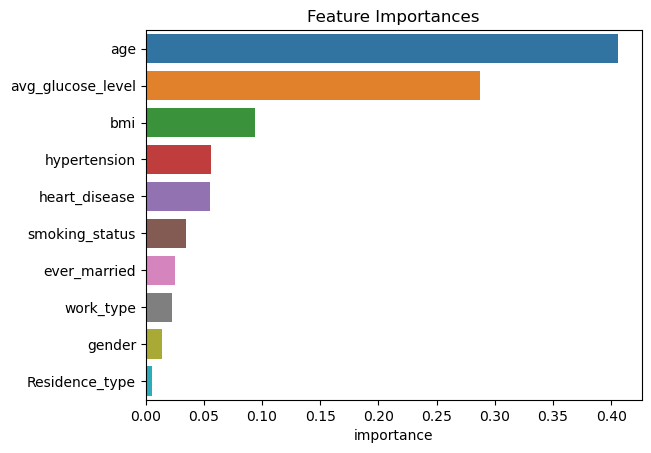

In [38]:
feature_importances = pd.DataFrame(grid_rf.best_estimator_.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

### Save the model

In [55]:
joblib.dump(grid_svm.best_estimator_, 'Stroke_Prediction_SVM_Model.pkl')

['Stroke_Prediction_SVM_Model.pkl']

In [39]:
joblib.dump(grid_rf.best_estimator_, 'Stroke_Prediction_RandomForest_Model.pkl')

['Stroke_Prediction_RandomForest_Model.pkl']